In [1]:
import pickle
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
benchmark = pickle.load(open('benchmark.pkl','rb'))
benchmark

,000905.SH
TRADE_DT,
20100104,4510.5270
20100105,4557.4750
20100106,4550.2790
20100107,4459.1550
20100108,4514.4520
...,...
20220427,5437.0374
20220428,5418.7641
20220429,5627.9021


In [3]:
CSI500_factor_data = pickle.load(open('CSI500_factor_data.pkl','rb'))
CSI500_factor_data

,,FactorValue
StockCode,TradingDate,
000001.SZ,20141231,0.179599
000002.SZ,20141231,0.075274
000004.SZ,20141231,-0.345539
000005.SZ,20141231,-0.143616
000006.SZ,20141231,0.016844
...,...,...
688668.SH,20211231,0.058465
688699.SH,20211231,0.831264
688777.SH,20211231,0.150947


In [4]:
price_data = pickle.load(open('price_data.pkl','rb'))
price_data

,20150105,20150202,20150302,20150401,20150504,20150601,20150701,20150803,20150901,20151008,...,20210506,20210601,20210701,20210802,20210901,20211008,20211101,20211201,20220104,20220207
S_INFO_WINDCODE,,,,,,,,,,,,,,,,,,,,,
000001.SZ,1138.28,968.46,996.88,1134.02,1420.62,1367.31,1197.04,1102.44,994.95,920.14,...,2609.64,2677.17,2596.59,2015.71,2001.16,2086.23,2170.17,1974.30,1864.62,1834.40
000002.SZ,1838.34,1588.05,1574.49,1691.62,1793.96,1834.65,1756.97,1862.01,1813.58,1665.74,...,4296.91,4093.76,3844.44,3216.52,3388.19,3456.54,2960.19,3005.76,3334.49,3402.84
000004.SZ,63.76,69.70,79.25,102.41,104.64,146.91,145.08,120.70,116.88,106.92,...,65.14,64.94,72.05,92.25,75.51,77.86,68.44,79.20,81.24,87.45
000005.SZ,38.00,38.00,38.00,38.00,38.00,137.62,76.55,63.95,54.49,61.35,...,19.55,16.59,16.96,19.37,21.87,20.11,20.02,20.57,21.87,19.93
000006.SZ,225.00,203.71,211.34,282.84,362.61,531.36,412.51,365.78,305.62,313.62,...,198.60,192.76,189.39,168.93,174.99,173.48,157.57,157.57,171.59,166.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688798.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,223.10,225.32,212.60,235.00,208.88,172.34
688799.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44.45,38.94,38.64,36.22,40.01,41.50,36.11
688800.SH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93.63,91.98,73.27,91.70,130.45,130.50,105.37


In [5]:
trading_dates = CSI500_factor_data.index.get_level_values(1)
trading_dates = list(OrderedDict.fromkeys(trading_dates))

In [6]:
trend = np.ones([10,price_data.shape[1]])

for i in range(1,trend.shape[1]):
    t = CSI500_factor_data.loc[CSI500_factor_data.index.get_level_values(1) == trading_dates[i-1]]
    t = t.sort_values('FactorValue',ascending=False)
    n = round(len(t) / 10)
    for j in range(9):
        stock_codes = t.iloc[j*n:(j+1)*n].index.get_level_values(0).to_list()
        prices = price_data.loc[stock_codes].iloc[:,i-1:i+1]
        trend[j][i] = np.mean(np.divide(np.array(prices.iloc[:,1]),np.array(prices.iloc[:,0])))
    stock_codes = t.iloc[9*n:].index.get_level_values(0).to_list()
    prices = price_data.loc[stock_codes].iloc[:,i-1:i+1]
    trend[9][i] = np.mean(np.divide(np.array(prices.iloc[:,1]),np.array(prices.iloc[:,0])))
    trend[:,i] = np.multiply(trend[:,i-1],trend[:,i])

cols = price_data.columns.to_list()
trend = pd.DataFrame(trend, index=range(1, 11), columns=cols)

benchmark = benchmark.loc[price_data.columns]
trend.loc['CSI500'] = (np.array(benchmark) / benchmark.iloc[0,0]).reshape((1,-1))[0]
trend #因子分十层测试净值走势

,20150105,20150202,20150302,20150401,20150504,20150601,20150701,20150803,20150901,20151008,...,20210506,20210601,20210701,20210802,20210901,20211008,20211101,20211201,20220104,20220207
1,1.0,1.093641,1.213282,1.520097,1.789827,2.370145,1.989780,1.753842,1.516402,1.725150,...,4.665602,4.934627,5.030877,5.117805,5.331794,5.395532,5.251064,5.719994,5.896693,5.440302
2,1.0,1.083574,1.194278,1.479773,1.744116,2.346924,1.938981,1.659075,1.388277,1.510612,...,2.983402,3.170449,3.224280,3.333898,3.533972,3.583325,3.492286,3.854278,4.105195,3.830262
3,1.0,1.065465,1.172595,1.454570,1.708816,2.232204,1.830804,1.604687,1.375747,1.488187,...,2.473003,2.619078,2.631835,2.698943,2.854510,2.902671,2.826461,3.118081,3.251260,3.035786
4,1.0,1.049678,1.151684,1.419088,1.629981,2.102583,1.759377,1.516305,1.319584,1.417586,...,2.347586,2.494814,2.547731,2.655321,2.789458,2.799133,2.725571,2.992308,3.161388,2.915678
5,1.0,1.056643,1.179421,1.436220,1.656868,2.142178,1.789041,1.503470,1.326393,1.413466,...,1.927738,2.052111,2.058184,2.147670,2.262550,2.311432,2.260587,2.469868,2.585692,2.363388
6,1.0,1.048094,1.161496,1.425364,1.652980,2.112598,1.741457,1.476059,1.259063,1.328512,...,1.478630,1.561502,1.562956,1.619697,1.686427,1.694378,1.634012,1.785094,1.860112,1.692829
7,1.0,1.046818,1.147554,1.393798,1.600092,2.092453,1.780930,1.486025,1.267655,1.344384,...,1.336708,1.430981,1.433740,1.493402,1.573619,1.583122,1.558569,1.738310,1.799428,1.644991
8,1.0,1.029146,1.129273,1.345957,1.543458,2.005130,1.609556,1.359892,1.174502,1.243728,...,0.986088,1.052401,1.056381,1.096654,1.145086,1.143482,1.113337,1.214966,1.245595,1.122857
9,1.0,1.049635,1.139887,1.385395,1.625965,2.093542,1.681395,1.383400,1.167258,1.236296,...,0.710909,0.760889,0.765120,0.803991,0.822335,0.815911,0.796729,0.872695,0.888129,0.791388
10,1.0,1.035000,1.150707,1.388491,1.550808,1.996890,1.595904,1.326534,1.143036,1.195583,...,0.356863,0.384697,0.376782,0.396047,0.392285,0.379165,0.378935,0.411110,0.428431,0.373018


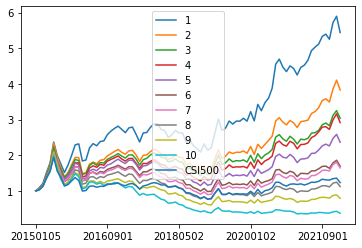

In [7]:
for i in trend.index:
    trend.loc[i].plot(label=str(i))
plt.legend()
plt.show()

In [8]:
# long the first group
results = np.zeros([8,5])
for i in range(7):
    results[i][0] = trend.iloc[0,12*(i+1)] / trend.iloc[0,12*i] - 1
    
    values = np.array(trend.iloc[0,12*i:12*(i+1)+1])
    monthly_returns = np.divide(values[1:], values[:-1]) - 1
    results[i][1] = np.std(monthly_returns) * math.sqrt(12)
    
    results[i][2] = 1 - values.min() / values.max()
    
    values_b = np.array(trend.iloc[-1,12*i:12*(i+1)+1])
    monthly_returns_b = np.divide(values_b[1:], values_b[:-1]) - 1
    monthly_returns_diff = monthly_returns - monthly_returns_b
    results[i][3] = np.sum(monthly_returns_diff > 0) / 12
    
    results[i][4] = (np.mean(monthly_returns) - np.mean(monthly_returns_b)) / np.std(monthly_returns)

results[7][0] = np.mean(results[0:7,0])
results[7][1] = np.mean(results[0:7,1])
values = np.array(trend.iloc[0,:-1])
results[7][2] = 1 - values.min() / values.max()
results[7][3] = np.mean(results[0:7,3])
monthly_returns = np.divide(values[1:], values[:-1]) - 1
values_b = np.array(trend.iloc[-1,:-1])
monthly_returns_b = np.divide(values_b[1:], values_b[:-1]) - 1
results[7][4] = (np.mean(monthly_returns) - np.mean(monthly_returns_b)) / np.std(monthly_returns)

results_df = pd.DataFrame(results, index=['2015','2016','2017','2018','2019','2020','2021','Total'], columns=['Annualized Return','Annualized Volatility','Max Drawdown','Monthly Winning Rate','Information Ratio'])
results_df

,Annualized Return,Annualized Volatility,Max Drawdown,Monthly Winning Rate,Information Ratio
2015,1.318288,0.511966,0.578085,0.916667,0.355348
2016,0.175959,0.296080,0.346137,0.916667,0.262018
2017,-0.013368,0.186643,0.176648,0.416667,-0.013825
2018,-0.204005,0.203383,0.225541,0.750000,0.288424
2019,0.504580,0.263402,0.335363,0.750000,0.158383
2020,0.375635,0.266613,0.368519,0.750000,0.139439
2021,0.330651,0.116490,0.279182,0.666667,0.411264
Total,0.355392,0.263511,0.830413,0.738095,0.207085
